Topic: Challenge Set 1 Subject: Explore MTA turnstile data Date: 04/13/2018 Name: student name Worked with: other students' name Location: sea18_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

#### Initial Setup
-Data was collected between mid-april and early May
-Code is set up where you just need to change the csv files and it will combine all 3 into one data *super_df* 

We also removed many columns that did not add value to the analysis.  Packages pandas, numpy, matplotlib, seaborn, datetime, and dateutil were used in this analysis.

In [137]:
import sys

In [138]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

import pprint

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

import dateutil.parser
from datetime import *

In [139]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 3)

In [140]:
#read data from this folder
df1 = pd.read_csv('turnstile_170422.csv')
df2 = pd.read_csv('turnstile_170429.csv')
df3 = pd.read_csv('turnstile_170506.csv')

In [141]:
#Work with turnstile name as combo
def Col_Con(mta):
    mta['TURNSTILE'] = mta['C/A'] + mta['UNIT'] + mta['SCP']
    mta.drop('C/A', axis=1, inplace = True)
    mta.drop('UNIT', axis=1,inplace = True)
    mta.drop('SCP', axis=1, inplace = True)
    mta = mta.drop('LINENAME', axis=1)
    mta = mta.drop('DIVISION', axis=1)
    mta = mta.drop('DESC', axis=1)
    mta.columns = mta.columns.str.strip()
    return mta

In [142]:
mta1 = Col_Con(df1)
mta2 = Col_Con(df2)
mta3 = Col_Con(df3)

In [143]:
leng = len(mta1.index)
leng3 = len(mta2.index)
leng4 = len(mta3.index)

In [144]:
# make new columns, blank
#Only use if we are using turnstiles as data 'mta['Cu_ENT'] = [0] * leng'
def new_cols(mta, leng):
    mta['ENT_COUNT'] = [0] * leng
    mta['EXT_COUNT'] = [0] * leng
    mta['DATE_TIME'] = [''] * leng
    mta['DATE_TIME_WD'] = [''] * leng
    mta['Donor_Est'] = [0] * leng
    return mta

In [145]:
mta1 = new_cols(mta1, leng)
mta2 = new_cols(mta2, leng3)
mta3 = new_cols(mta3, leng4)


## Manipulating Data

### Datetime

A datetime column was added to help consolidate the dataframe later in the program.  It helped us graph the mean traffic based on time of day.

### Summing Counts
The ENTRIES and EXITS column are set on a tally system, so it does not tell us exactly how many entries there were between the timestamp and the previous timestamp.  Using the column data, a entry per time period was calculated based on the marker at the current timestamp and the marker at the previous time stamp (300,000 - 289,000) = 11,000 people passed through the time stamp.

In [146]:
# Fill empty date time column with formula
# I dont think we will use this...
def date_time(df):
    leng= len(df.index)
    for i in range(leng):
        datetime = df.DATE[i]+ ' ' + df.TIME[i]      
        value = dateutil.parser.parse(datetime)
        df.at[i,'DATE_TIME'] = value
        df.at[i,'DATE_TIME_WD'] = int(value.weekday())
    return df

In [147]:
mta1 = date_time(mta1)
mta2 = date_time(mta2)
mta3 = date_time(mta3)

In [148]:
#fill empty ent_count with formula
def coun_ent(mta, leng):
    for i in range(leng):
        if i == 0: 
            mta.at[i,'ENT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.ENTRIES[i] - mta.ENTRIES[i-1] 
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'ENT_COUNT'] = diff
            else:
                mta.at[i,'ENT_COUNT'] = 0
    return mta

In [149]:
mta1 = coun_ent(mta1,leng)
mta2 = coun_ent(mta2, leng3)
mta3 = coun_ent(mta3, leng4)

In [150]:
#fill in new exit counts
def coun_ext(mta):
    leng = len(mta.index)
    for i in range(leng):
        if i == 0: 
            mta.at[i,'EXT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.EXITS[i] - mta.EXITS[i-1]
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'EXT_COUNT'] = diff
            else:
                mta.at[i,'EXT_COUNT'] = 0
                
    return mta

In [151]:
mta1 = coun_ext(mta1)
mta2 = coun_ext(mta2)
mta3 = coun_ext(mta3)

In [152]:
#checking dataframe
mta1.head(10)

STATION        DATE      TIME  ENTRIES    EXITS         TURNSTILE  \
0   59 ST  04/15/2017  00:00:00  6136580  2078941  A002R05102-00-00   
1   59 ST  04/15/2017  04:00:00  6136613  2078947  A002R05102-00-00   
2   59 ST  04/15/2017  08:00:00  6136639  2078987  A002R05102-00-00   
3   59 ST  04/15/2017  12:00:00  6136799  2079109  A002R05102-00-00   
4   59 ST  04/15/2017  16:00:00  6137076  2079173  A002R05102-00-00   
5   59 ST  04/15/2017  20:00:00  6137520  2079204  A002R05102-00-00   
6   59 ST  04/16/2017  00:00:00  6137732  2079231  A002R05102-00-00   
7   59 ST  04/16/2017  04:00:00  6137757  2079236  A002R05102-00-00   
8   59 ST  04/16/2017  08:00:00  6137784  2079258  A002R05102-00-00   
9   59 ST  04/16/2017  12:00:00  6137867  2079326  A002R05102-00-00   

   ENT_COUNT  EXT_COUNT            DATE_TIME DATE_TIME_WD  Donor_Est  
0          0          0  2017-04-15 00:00:00            5          0  
1         33          6  2017-04-15 04:00:00            5          0  
2         26         40  2017-04-15 08:00:00            5          0  
3        160        122  2017-04-15 12:00:00            5          0  
4        277         64  2017-04-15 16:00:00            5          0  
5        444         31  2017-04-15 20:00:00            5          0  
6        212         27  2017-04-16 00:00:00            6          0  
7         25          5  2017-04-16 04:00:00            6          0  
8         27         22  2017-04-16 08:00:00            6          0  
9         83         68  2017-04-16 12:00:00            6          0

In [156]:
#Removing obsolete columns
def mor_cln(mta):   
    mta = mta.drop('TIME', axis=1)
    mta = mta.drop('ENTRIES', axis=1)
    mta = mta.drop('EXITS', axis=1)
    return mta

In [157]:
mta1 = mor_cln(mta1)
mta2 = mor_cln(mta2)
mta3 = mor_cln(mta3)

ValueError: labels ['TIME'] not contained in axis

## Merging the Dataframes

### Initial Merge

The initial merge is for the csv dataframes that have undergone the manipulations up to the point.  It merges by 'STATION', 'DATE_TIME_WD' and 'DATE_TIME' (meaning we keep the columns as indexs, and need to reset_index to move them back to columns).  It also creates aggregated ENT_COUNT (entry count) and and EXT_COUNT(exit count) based on day of the week.  So the order is creating the entry and exit counts based turnstiles data per datetime hour.
Functions:
    -get_agg
    -merge_agg

### Secondary Merge

Using concat to 'stack' dataframes, then using get_agg_mean to get the mean of each station's entry count based on day of the week and datetime hour.  This results to our super_df.
    -get_agg_mean
    -merge_agg

In [158]:
#Creating a function to merge aggregate columns with original DF
def merge_agg(ent_agg, ext_agg):
    ent_agg.columns = ent_agg.columns.droplevel(level=1)
    ext_agg.columns = ext_agg.columns.droplevel(level=1)
    #Creating a new data frame removing repeted values
    q_mta = pd.merge(ent_agg, ext_agg, on=['STATION','DATE_TIME_WD','DATE_TIME'], how='left')
    return q_mta

In [159]:
#Creating a function to get aggregate sum data for two columns
def get_agg(mta):
    mt = mta.groupby(['STATION','DATE_TIME_WD', 'DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['sum']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['sum']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [160]:
#Creating a function to get aggregate mean data for two columns
def get_agg_mean(mta):
    mt = mta.groupby(['STATION','DATE_TIME_WD', 'DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['mean']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['mean']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [161]:
#Updating DF with aggregate data
mta1 = get_agg(mta1)
mta2 = get_agg(mta2)
mta3 = get_agg(mta3)

In [162]:
#Function that combines 3 dfs into one
def super_merge(a,b,c):
    new_df = pd.concat([a, b])
    q_mta = pd.concat([new_df, c])
    q_mta=get_agg_mean(q_mta)
    return q_mta


In [163]:
#Combining DFs
super_df = super_merge(mta1,mta2,mta3)

In [164]:
super_df

STATION  DATE_TIME_WD           DATE_TIME  ENT_COUNT  EXT_COUNT
0           1 AV             0 2017-04-17 00:00:00       1773       2382
1           1 AV             0 2017-04-17 04:00:00        279        273
2           1 AV             0 2017-04-17 08:00:00       1249       2769
3           1 AV             0 2017-04-17 12:00:00       4463       4413
4           1 AV             0 2017-04-17 16:00:00       3553       3549
5           1 AV             0 2017-04-17 20:00:00       5921       5527
6           1 AV             0 2017-04-24 00:00:00       2481       2334
7           1 AV             0 2017-04-24 04:00:00        355        268
8           1 AV             0 2017-04-24 08:00:00       1693       3525
9           1 AV             0 2017-04-24 12:00:00       4882       5700
10          1 AV             0 2017-04-24 16:00:00       4761       3987
11          1 AV             0 2017-04-24 20:00:00       6660       6091
12          1 AV             0 2017-05-01 00:00:00       2427       2519
13          1 AV             0 2017-05-01 04:00:00        388        316
14          1 AV             0 2017-05-01 08:00:00       1667       3433
15          1 AV             0 2017-05-01 12:00:00       4882       5656
16          1 AV             0 2017-05-01 16:00:00       4817       3870
17          1 AV             0 2017-05-01 20:00:00       6798       5873
18          1 AV             1 2017-04-18 00:00:00       2984       2869
19          1 AV             1 2017-04-18 04:00:00        501        274
20          1 AV             1 2017-04-18 08:00:00       1463       2928
21          1 AV             1 2017-04-18 12:00:00       4744       4423
22          1 AV             1 2017-04-18 16:00:00       3671       3617
23          1 AV             1 2017-04-18 20:00:00       6294       6138
24          1 AV             1 2017-04-25 00:00:00       3027       3086
25          1 AV             1 2017-04-25 04:00:00        438        342
26          1 AV             1 2017-04-25 08:00:00       1838       3486
27          1 AV             1 2017-04-25 12:00:00       5205       6093
28          1 AV             1 2017-04-25 16:00:00       4910       3934
29          1 AV             1 2017-04-25 20:00:00       6847       7883
30          1 AV             1 2017-05-02 00:00:00       3449       3044
31          1 AV             1 2017-05-02 04:00:00        518        292
32          1 AV             1 2017-05-02 08:00:00       1791       3562
33          1 AV             1 2017-05-02 12:00:00       5005       5906
34          1 AV             1 2017-05-02 16:00:00       4752       3848
35          1 AV             1 2017-05-02 20:00:00       7228       6118
36          1 AV             2 2017-04-19 00:00:00       3401       3594
37          1 AV             2 2017-04-19 04:00:00        498        359
38          1 AV             2 2017-04-19 08:00:00       1797       3664
39          1 AV             2 2017-04-19 12:00:00       5266       5569
40          1 AV             2 2017-04-19 16:00:00       5086       4161
41          1 AV             2 2017-04-19 20:00:00       6841       6857
42          1 AV             2 2017-04-26 00:00:00       2833       3702
43          1 AV             2 2017-04-26 04:00:00        352        340
44          1 AV             2 2017-04-26 08:00:00       1960       3499
45          1 AV             2 2017-04-26 12:00:00       5539       5954
46          1 AV             2 2017-04-26 16:00:00       4940       4248
47          1 AV             2 2017-04-26 20:00:00       7065       6537
48          1 AV             2 2017-05-03 00:00:00       3661       3478
49          1 AV             2 2017-05-03 04:00:00        564        345
50          1 AV             2 2017-05-03 08:00:00       1737       3715
51          1 AV             2 2017-05-03 12:00:00       4995       5865
52          1 AV             2 2017-05-03 16:00:00       4977       4235
53          1 AV             2 2017-05-03 20:00:00       7324      

## Creating unique dataframes

### Entrys per day

We are removing the extra datetime column and focusing solely on the weekday for dataframe no_dt (ie no datetime).  We have to copy super_df and then aggregate sum the traffic over the each day (because we are summing the total entries at each datetime point).  Then we merge the two series together and return a new dataframe.

In [171]:
#Creating new functions to get aggregates over an entire day and combine with original DF
def merge_agg_day(ent_agg, ext_agg):
    ent_agg.columns = ent_agg.columns.droplevel(level=1)
    ext_agg.columns = ext_agg.columns.droplevel(level=1)
    #Creating a new data frame removing repeted values
    q_mta = pd.merge(ent_agg, ext_agg, on=['STATION','DATE_TIME_WD'], how='left')
    return q_mta

def get_agg_day(mta):
    mt = mta.groupby(['STATION','DATE_TIME_WD'])
    ent_agg = mt.agg({'ENT_COUNT':['sum']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['sum']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg_day(ent_agg, ext_agg)
    return fin_agg

In [172]:
#Creates a DF with cumulative entries per day per station with no datetime object
no_dt = get_agg_day(super_df)
no_dt

STATION  DATE_TIME_WD  ENT_COUNT  EXT_COUNT
0                1 AV             0      59049      62485
1                1 AV             1      64665      67843
2                1 AV             2      68836      72679
3                1 AV             3      70561      72431
4                1 AV             4      70850      74829
5                1 AV             5      41272      42939
6                1 AV             6      43055      45821
7              103 ST             0      92677      60439
8              103 ST             1      97480      64521
9              103 ST             2     103862      67716
10             103 ST             3     103893      66754
11             103 ST             4     101283      65609
12             103 ST             5      50144      35094
13             103 ST             6      46057      37224
14      103 ST-CORONA             0      59085      38800
15      103 ST-CORONA             1      60663      44135
16      103 ST-CORONA             2      62447      43386
17      103 ST-CORONA             3      63159      45432
18      103 ST-CORONA             4      62486      43933
19      103 ST-CORONA             5      40600      23591
20      103 ST-CORONA             6      35071      25127
21             104 ST             0       9384       2522
22             104 ST             1       9657       2736
23             104 ST             2      10204       2902
24             104 ST             3      10211       2700
25             104 ST             4       9630       2725
26             104 ST             5       3079        936
27             104 ST             6       2543        849
28             110 ST             0      35398      25910
29             110 ST             1      36719      27992
30             110 ST             2      39357      29141
31             110 ST             3      39064      28989
32             110 ST             4      38272      28572
33             110 ST             5      21032      16191
34             110 ST             6      18956      17299
35             111 ST             0      52036      29148
36             111 ST             1      52817      32091
37             111 ST             2      54844      31708
38             111 ST             3      55593      32492
39             111 ST             4      54288      31453
40             111 ST             5      29716      18260
41             111 ST             6      27185      20348
42             116 ST             0     101981      48939
43             116 ST             1     106468      51414
44             116 ST             2     112776      54379
45             116 ST             3     113210      54382
46             116 ST             4     110274      53495
47             116 ST             5      62561      29808
48             116 ST             6      61008      32769
49    116 ST-COLUMBIA             0      44255      24548
50    116 ST-COLUMBIA             1      50199      25824
51    116 ST-COLUMBIA             2      50191      26105
52    116 ST-COLUMBIA             3      51372      26301
53    116 ST-COLUMBIA             4      49349      23838
54    116 ST-COLUMBIA             5      20331      11365
55    116 ST-COLUMBIA             6      18479      11334
56             121 ST             0       2763        541
57             121 ST             1       2863        501
58             121 ST             2       2827        482
59             121 ST             3       2914        476
60             121 ST             4       2710        437
61             121 ST             5       1076        403
62             121 ST             6       1081        310
63             125 ST             0     213883     172017
64             125 ST             1     220808     178677
65             125 ST             2     230864     187461
66             125 ST             3     237147     187830
67             125 ST             4     227248     186071
68          

In [235]:
#Sorting DF and getting the top 30 stations
super_df.sort_values(by=['ENT_COUNT'], ascending = 0, inplace = True)
uni_stations = list(super_df.STATION.unique())[:20]

### Entries per time period

The following sets up and cleans the graph for showing the amount of riders perevery 4 hours.  We start by setting the datetime to an hour so we can graph it easier.  We then filter out the top 20 stations to avoid over complicating the graph.  We then use aggregate sum on the entry counts and exit counts, then merge it to a new dataframe.

Functions used:
    - get_agg_time
    - merge_agg_time

In [236]:
#Setting values for code below
super_df.reset_index(drop=True, inplace = True)
f = dateutil.parser.parse('02:00:00')
late = dateutil.parser.parse('23:00:00')
mid = dateutil.parser.parse('00:00:00')


In [225]:
#Creating a column to use as an axis for plotting daily trends
#Creating a better df for reading traffic per date time
for i in range(len(super_df.index)):
    val = (super_df['DATE_TIME'][i]).hour
    #moving the midnight values (because it returns a 0) to 11 pm values to make a better looking graph
    if val == mid.hour:
        val =late.hour
    super_df.at[i,'New_DATE_TIME'] = val
    #removing bad data
    if super_df.ENT_COUNT[i] >=100000 and (val<f.hour or val>late.hour):
        super_df.drop(i, inplace = True)
    if super_df.ENT_COUNT[i] <=1000 or super_df['DATE_TIME_WD'][i]>=5:
        super_df.drop(i, inplace = True)


In [226]:
#Creating new data while sorting out low traffic stations, then resetting the indeces
uni_df = super_df[super_df['STATION'].isin(uni_stations)]
uni_df.reset_index(drop=True, inplace = True)

In [228]:
#Creating new functions to get aggregates over an entire day and combine with original DF
def merge_agg_time(ent_agg, ext_agg):
    ent_agg.columns = ent_agg.columns.droplevel(level=1)
    ext_agg.columns = ext_agg.columns.droplevel(level=1)
    #Creating a new data frame removing repeted values
    q_mta = pd.merge(ent_agg, ext_agg, on=['STATION','DATE_TIME_WD','New_DATE_TIME'], how='left')
    return q_mta

def get_agg_time(mta):
    mt = mta.groupby(['STATION','DATE_TIME_WD','New_DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['sum']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['sum']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg_time(ent_agg, ext_agg)
    return fin_agg


In [229]:
uni_df = get_agg_time(uni_df)
uni_df

STATION  DATE_TIME_WD  New_DATE_TIME  ENT_COUNT  EXT_COUNT
0     14 ST-UNION SQ             0              1      25582       9217
1     14 ST-UNION SQ             0              9      25256      54603
2     14 ST-UNION SQ             0             13      40712      77180
3     14 ST-UNION SQ             0             17      82645      60581
4     14 ST-UNION SQ             0             21     122230      59819
5     14 ST-UNION SQ             1              1      39940      11557
6     14 ST-UNION SQ             1              5       1105        520
7     14 ST-UNION SQ             1              9      26207      57448
8     14 ST-UNION SQ             1             13      43240      78610
9     14 ST-UNION SQ             1             17      84156      60270
10    14 ST-UNION SQ             1             21     124063      63197
11    14 ST-UNION SQ             2              1      42315      12693
12    14 ST-UNION SQ             2              5       1116        545
13    14 ST-UNION SQ             2              9      27016      59766
14    14 ST-UNION SQ             2             13      46057      80395
15    14 ST-UNION SQ             2             17      89153      63499
16    14 ST-UNION SQ             2             21     126731      65737
17    14 ST-UNION SQ             3              1      46894      12966
18    14 ST-UNION SQ             3              5       1129        518
19    14 ST-UNION SQ             3              9      26422      58260
20    14 ST-UNION SQ             3             13      44207      78245
21    14 ST-UNION SQ             3             17      88781      62910
22    14 ST-UNION SQ             3             21     125679      68059
23    14 ST-UNION SQ             4              1      46317      12675
24    14 ST-UNION SQ             4              5      10141       3965
25    14 ST-UNION SQ             4              9      24283      54536
26    14 ST-UNION SQ             4             13      45474      79822
27    14 ST-UNION SQ             4             17      90815      62816
28    14 ST-UNION SQ             4             21     116690      69854
29             23 ST             0              1       4880       2554
30             23 ST             0              8       8349      16331
31             23 ST             0              9      12296      22571
32             23 ST             0             12      38188      62248
33             23 ST             0             13      19755      28627
34             23 ST             0             16      45580      31966
35             23 ST             0             17      32854      20064
36             23 ST             0             20      99302      38508
37             23 ST             0             21      44702      22407
38             23 ST             0             23      16994       6523
39             23 ST             1              1      10735       3856
40             23 ST             1              4       2222        486
41             23 ST             1              8       8712      17326
42             23 ST             1              9      12842      21491
43             23 ST             1             12      41263      67325
44             23 ST             1             13      21317      28367
45             23 ST             1             16      47749      33318
46             23 ST             1             17      34901      22802
47             23 ST             1             20     108259      41346
48             23 ST             1             21      49799      23554
49             23 ST             1             23      34521       9596
50             23 ST             2              1      12540       4454
51             23 ST             2              4       2204        483
52             23 ST             2              8       9398      17987
53             23 ST             2              9      13355      23789
54             23 ST             2             12    

## Filtering the no_dt dataframe

We take the no_dt dataframe and filter out the top 20 stations to make a plot over.

In [237]:
no_dt_df = no_dt[no_dt['STATION'].isin(uni_stations)]
no_dt_df.sort_values(by='ENT_COUNT', ascending = 0, inplace = True)
no_dt_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [205]:
no_dt_df

STATION  DATE_TIME_WD  ENT_COUNT  EXT_COUNT
0     34 ST-PENN STA             2     530648     434035
1     34 ST-PENN STA             4     525558     444082
2     34 ST-PENN STA             1     513455     427879
3     34 ST-PENN STA             0     495428     391753
4    GRD CNTRL-42 ST             2     486896     432875
5    GRD CNTRL-42 ST             1     486270     429489
6     34 ST-PENN STA             3     483462     408489
7    GRD CNTRL-42 ST             3     483001     433146
8    GRD CNTRL-42 ST             4     467129     419581
9    GRD CNTRL-42 ST             0     434668     397578
10             23 ST             3     398143     294163
11             23 ST             2     392680     282580
12   34 ST-HERALD SQ             2     375235     349945
13   34 ST-HERALD SQ             3     375098     353756
14             23 ST             1     373945     270597
15   34 ST-HERALD SQ             4     372345     339232
16             23 ST             4     371270     262397
17   34 ST-HERALD SQ             1     356272     341541
18    14 ST-UNION SQ             3     335814     283332
19   34 ST-HERALD SQ             0     335295     314320
20    14 ST-UNION SQ             2     334229     283648
21    14 ST-UNION SQ             4     333720     283668
22             23 ST             0     325753     253174
23    14 ST-UNION SQ             1     320814     273282
24         FULTON ST             3     309005     254961
25    TIMES SQ-42 ST             2     308822     279445
26    TIMES SQ-42 ST             3     307783     280895
27    TIMES SQ-42 ST             4     306130     285152
28         FULTON ST             2     304647     251129
29         FULTON ST             1     303731     247576
30         FULTON ST             4     301216     241960
31    14 ST-UNION SQ             0     298900     262833
32    TIMES SQ-42 ST             1     290876     269832
33   42 ST-PORT AUTH             3     289525     223811
34   42 ST-PORT AUTH             4     283993     238228
35   42 ST-PORT AUTH             2     282614     226449
36         FULTON ST             0     276809     233136
37             86 ST             2     275004     227464
38             86 ST             1     274717     217898
39    TIMES SQ-42 ST             0     274146     256946
40             86 ST             3     273729     224364
41   42 ST-PORT AUTH             1     272888     225837
42             86 ST             4     266408     224576
43   42 ST-PORT AUTH             0     266142     199159
44             86 ST             0     251376     200773
45    59 ST COLUMBUS             3     244455     193871
46    59 ST COLUMBUS             2     241978     190074
47             59 ST             3     235618     181001
48             59 ST             2     233596     179249
49    59 ST COLUMBUS             4     232116     178320
50             59 ST             4     229887     174512
51    59 ST COLUMBUS             1     229374     180741
52    34 ST-PENN STA             6     228176     197289
53             59 ST             1     224997     173824
54       CHAMBERS ST             3     224338     154670
55       CHAMBERS ST             2     220898     151901
56    34 ST-PENN STA             5     220162     212571
57          CANAL ST             3     219037     176536
58          CANAL ST             4     217659     174557
59          CANAL ST             2     214351     170518
60       CHAMBERS ST             1     210858     145549
61          CANAL ST             1     208337     167295
62       CHAMBERS ST             4     205849     144443
63             59 ST             0     204781     162789
64    59 ST COLUMBUS             0     200424     165788
65          CANAL ST             0     198909     163359
66    47-50 STS ROCK             2     192212     198037
67    47-50 STS ROCK             3     192143     199959
68    14 ST-UNION SQ             5     188674     181960
69       CHAMBERS ST   

## Graphing

### Seaborn lmplot

Using the uni_df created to graph the ridership based on time of day, we make a seaborn (denoted sns in code) lmplot.  the sns.set() allows us to manipulate different aspects of the graph.  It's more or less self explanatory.  The second block of code does the following (corresponds with line of code):
    - resets the graph attributes to default (negating everything in previous block of code)
    - creates a list for the x-axis labels
    - creates a fig variable that plots the lmplot, x_bins trys to clean up the graph by creating bins.
    - sets axis titles
    - relabels x axis with a list with len corresponding to original amount of tick marks
    - adds a plot title
    
### Seaborn pinpoint plot

We are creating a pinpoint plot to show the trend of ridership over a full week.
The 3rd block of coding does the following:
    - tells ipython to create a pop up with the graph
    - creates a list to relabel x axis
    - creates pinpoint graph, also sets title using .set
    - relabels x and y axis

In [206]:
# Graphs are below
import seaborn as sns
import matplotlib.dates as mdates
#Setting graph conponents
sns.set(rc={"font.style":"normal",
            "axes.facecolor":('white'),
            "figure.facecolor":'black',
            "grid.color":'black',
            "grid.linestyle":':',
            "axes.grid":True,
            'axes.labelsize':15,
            'figure.figsize':(30, 30),
            'xtick.labelsize':12,
            'ytick.labelsize':12})

Text(0.5,1,'20 Largest Stations: Daily Traffic')

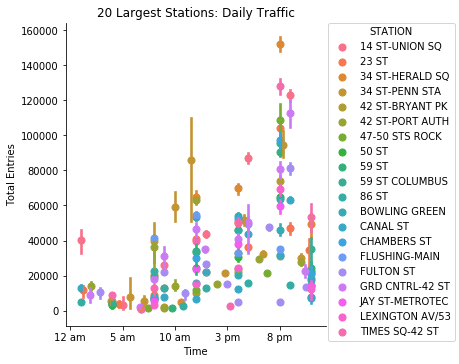

In [234]:
sns.reset_orig()
%matplotlib inline
# build the figure
hours = ['','12 am','5 am','10 am', '3 pm', '8 pm']

fig = sns.lmplot(y="ENT_COUNT", x="New_DATE_TIME", data=uni_df, hue = 'STATION', fit_reg = False, x_bins=12)
fig = fig.set_axis_labels('Time', 'Total Entries')
fig = fig.set(xticklabels=hours)
plt.title('20 Largest Stations: Daily Traffic')

In [97]:
%matplotlib osx

week = ['Monday','Tuesday', 'Wednesday','Thursday', 'Friday','Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(15,12))
fig = sns.pointplot(y="ENT_COUNT", x="DATE_TIME_WD", data=no_dt_df, join=True, hue='STATION', ax=ax, linestyles='-').set_title('20 Largest Traffic Stations')
ax.set(xlabel='Dates', ylabel='Total Entries', xticklabels=week)


[Text(0,0.5,'Total Entries'),
 [Text(0,0,'Monday'),
  Text(0,0,'Tuesday'),
  Text(0,0,'Wednesday'),
  Text(0,0,'Thursday'),
  Text(0,0,'Friday'),
  Text(0,0,'Saturday'),
  Text(0,0,'Sunday')],
 Text(0.5,0,'Dates')]